# 🌸 KNN with Flowers 🌸

In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [5]:
iris_full = load_iris()

<IPython.core.display.Javascript object>

## Data Manipulation Practice

* Create a `pandas.DataFrame` from `iris_full`.
* Include: 
    * `X` (aka `iris_full['data']`)
        * and its column names (aka `iris_full['feature_names']`)
    * `y` (aka `iris_full['target']`)
    * An additional column for the class labels (aka `iris_full['target_names']`)

In [35]:
targets = list(iris_full["target_names"])
target_map = {}
for i, target in enumerate(targets):
    target_map[i] = target

target_map

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

<IPython.core.display.Javascript object>

In [39]:
X = pd.DataFrame(iris_full["data"], columns=iris_full["feature_names"])
y = pd.Series(iris_full["target"], name="label")

iris = pd.concat((X, y), axis=1)
iris["label_name"] = iris["label"].replace(target_map)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<IPython.core.display.Javascript object>

## Viz Practice

Use seaborn to make a `scatterplot` of `'sepal length (cm)'` by `'sepal width (cm)'`, colored by the species.

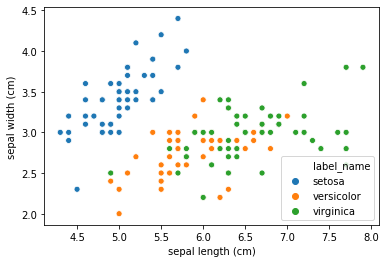

<IPython.core.display.Javascript object>

In [40]:
sns.scatterplot("sepal length (cm)", "sepal width (cm)", hue="label_name", data=iris)
plt.show()

Use seaborn to make a `scatterplot` of `'petal length (cm)'` by `'petal width (cm)'`, colored by the species.

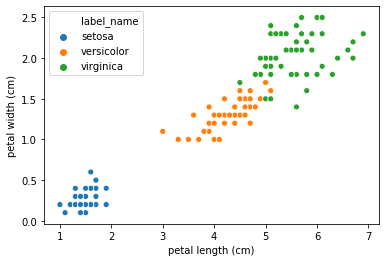

<IPython.core.display.Javascript object>

In [41]:
sns.scatterplot("petal length (cm)", "petal width (cm)", hue="label_name", data=iris)
plt.show()

## Programming Practice

Write a function to compute euclidean distance.  Between 2 rows in `X`.

Euclidean distance for 2d data is shown below.  In the formula, $a = (x_1, y_1)$ and $b = (x_2, y_2)$

$$dist(a, b) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

An example when $a = (1, 1)$ & $b = (4, 4)$.

$$dist(a, b) = \sqrt{(1 - 4)^2 + (1 - 4)^2} = \sqrt{(9 + 9)} \approx 4.24$$

Step 1:
* Forget about funciton land for now.
* Recreate the input & output from the formula/example shown above
    * `a` and `b` are defined for you, recreate the ~`4.24` output

In [43]:
a = (1, 1)
b = (4, 4)

<IPython.core.display.Javascript object>

In [49]:
sum_sq_d = (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2
np.sqrt(sum_sq_d)

4.242640687119285

<IPython.core.display.Javascript object>

Step 2:
* Make the process you just wrote work for 3d points
    * The distance for `c` and `d` below should be ~`5.196`

In [52]:
c = (1, 1, 1)
d = (4, 4, 4)

<IPython.core.display.Javascript object>

In [53]:
sum_sq_d = (c[0] - d[0]) ** 2 + (c[1] - d[1]) ** 2 + (c[2] - d[2]) ** 2
np.sqrt(sum_sq_d)

5.196152422706632

<IPython.core.display.Javascript object>

Step 3:
* Make the process you've written work for $n$d points
* Use the same test cases as before to confirm the process works
    * Test case 1 reminder: `dist(a, b)` $\approx$ `4.242`
    * Test case 2 reminder: `dist(c, d)` $\approx$ `5.196`
    
*Hint: the [`zip()`](https://data-flair.training/blogs/python-zip-function/) function could be a potential step towards accomplishing this*

In [64]:
x = c
y = d

sum_sq_d = 0
for xi, yi in zip(x, y):
    sq_d_i = (xi - yi) ** 2
    sum_sq_d += sq_d_i

np.sqrt(sum_sq_d)

4.242640687119285

<IPython.core.display.Javascript object>

Step 4:
* Make your code a function
    * Give it a name tag
    * Give it 2 parameters (the 2 points you want to measure the distance between)
* Run the function on the same 2 boring test cases to make sure everything is still working as expected.

In [68]:
def euclid_dist(x, y):
    sum_sq_d = 0
    for xi, yi in zip(x, y):
        sq_d_i = (xi - yi) ** 2
        sum_sq_d += sq_d_i

    return np.sqrt(sum_sq_d)

<IPython.core.display.Javascript object>

In [69]:
euclid_dist(a, b)

4.242640687119285

<IPython.core.display.Javascript object>

In [70]:
euclid_dist(c, d)

5.196152422706632

<IPython.core.display.Javascript object>

Note, using `assert` statements is how you can write 'unit tests' for your code using the [`pytest` package](https://docs.pytest.org/en/latest/).  `pytest` looks for functions named a certain way; one of these ways is that the function name starts with `test_`.  More on pytest here: [pytest: Installation and Getting Started](https://docs.pytest.org/en/latest/getting-started.html#create-your-first-test)

How these tests might look for your function (which is assumed below to be called `euclid_dist`):

In [71]:
def test_euclid_dist_2d():
    result = euclid_dist((1, 1), (4, 4))
    result = round(result, 2)

    assert result == 4.24


def test_euclid_dist_3d():
    result = euclid_dist((1, 1, 1), (4, 4, 4))
    result = round(result, 2)

    assert result == 5.20

<IPython.core.display.Javascript object>

Step 5:
* Use your function to measure the distance between the first two rows of your iris dataframe.

In [78]:
# # as practice, classify this record:
# sepal length (cm)    5.1
# sepal width (cm)     3.0
# petal length (cm)    2.4
# petal width (cm)     0.5

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64

<IPython.core.display.Javascript object>

In [74]:
row_1 = X.iloc[0, :]
row_2 = X.iloc[1, :]

<IPython.core.display.Javascript object>

In [77]:
euclid_dist(row_1, row_2)

0.5385164807134502

<IPython.core.display.Javascript object>

## Theory Practice

Plot boxplots for each of your `X` features.

Plot the same scatterplots from before with standardized axis ranges.  Set all the axes to be `(0, 8)`.

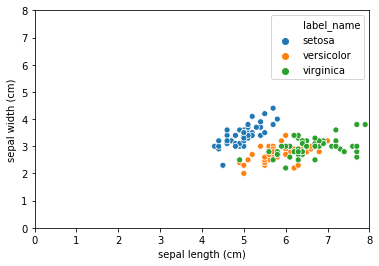

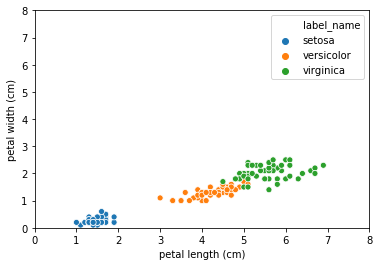

<IPython.core.display.Javascript object>

In [79]:
ax = sns.scatterplot(
    "sepal length (cm)", "sepal width (cm)", hue="label_name", data=iris
)
ax.set(xlim=(0, 8), ylim=(0, 8))
plt.show()

ax = sns.scatterplot(
    "petal length (cm)", "petal width (cm)", hue="label_name", data=iris
)
ax.set(xlim=(0, 8), ylim=(0, 8))
plt.show()

What's the issue with this?

Answer: different scales is a big issue in KNN.  Judging by our plots, 